# Calculate Price Elasticity of Demand

In [25]:
import pandas as pd
import statsmodels.api as sm 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def ped1(group):
    X = sm.add_constant(group['sell_price'])
    model = sm.OLS(group['sold'], X).fit()
    price_coef = model.params['sell_price']
    mean_sellprice = np.mean(group['sell_price'])
    mean_quantity = np.mean(group['sold'])
    ped = price_coef * (mean_sellprice / mean_quantity)
    return ped

In [272]:
# OLS method
def ped2(group):
    X = sm.add_constant(group['sell_price'])
    model = sm.OLS(group['sold'], X).fit()
    price_coef = model.params['sell_price']
    return price_coef

In [204]:
def ped3(data_df):
    # Calculate the percentage change in quantity demanded
    data_df['percentage_change_quantity'] = data_df['sold'].pct_change() * 100

    # Calculate the percentage change in price
    data_df['percentage_change_price'] = data_df['sell_price'].pct_change() * 100

    # Calculate the average price
    data_df['average_price'] = (data_df['sell_price'].shift(1) + data_df['sell_price']) / 2
    
    # Calculate the average quantity demanded
    data_df['average_quantity'] = (data_df['quantity'].shift(1) + data_df['quantity']) / 2
    
    #Calculate the price elasticity of demand (PED)
    data_df['PED'] = data_df['percentage_change_quantity'] / data_df['percentage_change_price']
    
    return data_df

In [9]:
# a point elasticity measure
def ped4(df):
    df['PED'] = ((df['sold'].diff() / ((df['sold'] + df['sold'].shift(-1)) / 2)) /
             (df['sell_price'].diff() / ((df['sell_price'] + df['sell_price'].shift(-1)) / 2)))
    return df

In [223]:
def ped5(data_df):
    data_df['PED'] = data_df['percentage_change_quantity'] / data_df['percentage_change_price']
    return data_df

## Calculate PED for hobbies items

In [5]:
hobbies_df = pd.read_csv('hobbies_df.csv')
hobbies_df =hobbies_df.drop(hobbies_df.columns[0],axis=1)
hobbies_df = hobbies_df.dropna(subset = ['sell_price'])

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_51367/2682829624.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  hobbies_df = pd.read_csv('hobbies_df.csv')


In [18]:
hobbies_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sold,date,wm_yr_wk,...,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,d_1,12,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.46
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,d_1,2,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,1.56
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,3.17
11,HOBBIES_1_012_CA_1_validation,HOBBIES_1_012,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,5.98
14,HOBBIES_1_015_CA_1_validation,HOBBIES_1_015,HOBBIES_1,HOBBIES,CA_1,CA,d_1,4,2011-01-29,11101,...,1,2011,NaN,NaN,NaN,NaN,0,0,0,0.70


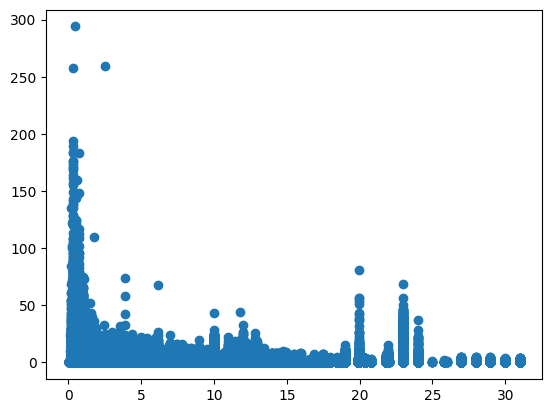

<Figure size 1000x600 with 0 Axes>

In [6]:
# To get a rough idea of relationship between price and quantity
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(hobbies_df['sell_price'],hobbies_df['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [10]:
# Group by 'id' and 'wm_yr_wk', and aggregate 'sold' with sum and 'sell_price' with mean
sum_sold_mean_price = hobbies_df.groupby(['id','item_id', 'dept_id','store_id','state_id','wm_yr_wk']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()

# Sort the DataFrame by 'wm_yr_wk' to ensure consecutive weeks
sum_sold_mean_price.sort_values(by='wm_yr_wk', inplace=True)

# Assign group numbers for every 4 weeks
group_size = 4
sum_sold_mean_price['4_week_group'] = sum_sold_mean_price.groupby(['id','item_id', 'dept_id','store_id','state_id'])['wm_yr_wk'].transform(lambda x: (x.rank(method='dense') - 1) // group_size)

# Group by 'id' and '4_week_group', and aggregate 'sold' with sum and 'sell_price' with mean
hobbies_4_weeks = sum_sold_mean_price.groupby(['id','item_id', 'dept_id','store_id','state_id', '4_week_group']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()

# Rename the columns for clarity
hobbies_4_weeks.columns = ['id','item_id', 'dept_id','store_id','state_id', '4_week_group', 'sold', 'sell_price']

In [23]:
sum_sold_mean_price_4_weeks.head()

,id,item_id,dept_id,store_id,state_id,4_week_group,sold,sell_price
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,0.0,5,8.92
1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,1.0,12,8.26
2,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,2.0,14,8.26
3,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,3.0,12,8.26
4,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,CA_1,CA,4.0,19,8.26


In [21]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
sum_ped_id_hobbies = hobbies_df.groupby(['id','wm_yr_wk']).agg({'sold': 'sum', 'sell_price': 'mean'}).reset_index()
print(sum_ped_id_hobbies)

                                    id  wm_yr_wk  sold  sell_price
0        HOBBIES_1_001_CA_1_validation     11325     1        9.58
1        HOBBIES_1_001_CA_1_validation     11326     0        9.58
2        HOBBIES_1_001_CA_1_validation     11327     2        8.26
3        HOBBIES_1_001_CA_1_validation     11328     2        8.26
4        HOBBIES_1_001_CA_1_validation     11329     6        8.26
...                                ...       ...   ...         ...
1238700  HOBBIES_2_149_WI_3_validation     11609     0        0.97
1238701  HOBBIES_2_149_WI_3_validation     11610     1        0.97
1238702  HOBBIES_2_149_WI_3_validation     11611     1        0.97
1238703  HOBBIES_2_149_WI_3_validation     11612     2        0.97
1238704  HOBBIES_2_149_WI_3_validation     11613     0        0.97

[1238705 rows x 4 columns]


In [8]:
sum_sold_mean_price_4_weeks.head()

,item_id,4_week_group,sold,sell_price
0,HOBBIES_1_001,0.0,48,8.969
1,HOBBIES_1_001,1.0,84,8.431
2,HOBBIES_1_001,2.0,92,8.332
3,HOBBIES_1_001,3.0,109,8.332
4,HOBBIES_1_001,4.0,127,8.314


In [38]:
# How the whole category react to price changes.
# Ex: All hobbies items in the whole Australia.
ped_hobbies = hobbies_df.groupby('cat_id').apply(ped1, include_groups = False)
print(ped_hobbies)

cat_id
HOBBIES   -0.3675
dtype: float64


In [29]:
# How all hobbies items in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_hobbies = hobbies_df.groupby('state_id').apply(ped1,include_groups=False)
print(ped_state_item_id_hobbies)

state_id
CA   -0.423506
TX   -0.228639
WI   -0.396050
dtype: float64


In [30]:
# How all foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_hobbies = hobbies_df.groupby('store_id').apply(ped1,include_groups=False)
print(ped_store_item_id_hobbies)

store_id
CA_1   -0.388192
CA_2   -0.445331
CA_3   -0.412122
CA_4   -0.468916
TX_1   -0.342390
TX_2   -0.255702
TX_3   -0.106331
WI_1   -0.406485
WI_2   -0.348538
WI_3   -0.418785
dtype: float64


In [39]:
# How different department react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_dept_id_hobbies = hobbies_df.groupby('dept_id').apply(ped1, include_groups = False)
print(ped_dept_id_hobbies)

dept_id
HOBBIES_1   -0.545789
HOBBIES_2   -0.354913
dtype: float64


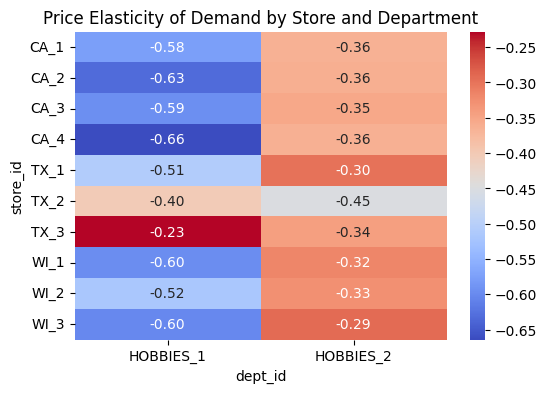

In [51]:
# How different department in different stores react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_dept_id_hobbies = hobbies_df.groupby(['store_id','dept_id']).apply(ped1, include_groups = False)
print(ped_store_dept_id_hobbies)
ped_store_dept_id_hobbies = ped_store_dept_id_hobbies.to_frame().reset_index()
ped_store_dept_id_hobbies.columns = ['store_id', 'dept_id', 'PED']

# Creating a heatmap
plt.figure(figsize=(6, 4))
heatmap_data = ped_store_dept_id_hobbies.pivot(index='store_id', columns='dept_id', values='PED')
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Price Elasticity of Demand by Store and Department')
plt.show()

item_id
HOBBIES_1_001   -6.313660
HOBBIES_1_002    1.685968
HOBBIES_1_003   -0.221408
HOBBIES_1_004    2.018078
HOBBIES_1_005   -1.956470
                   ...   
HOBBIES_2_145    5.677457
HOBBIES_2_146    1.597707
HOBBIES_2_147    1.000000
HOBBIES_2_148    0.829395
HOBBIES_2_149   -1.139089
Length: 565, dtype: float64


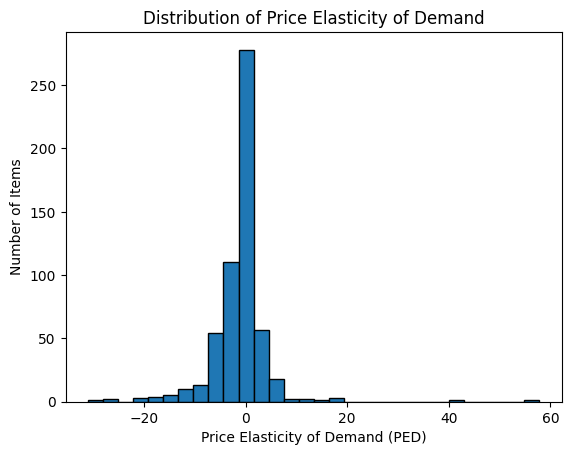

In [53]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_hobbies = hobbies_df.groupby('item_id').apply(ped1, include_groups = False)
print(ped_item_id_hobbies)
ped_item_id_hobbies = ped_item_id_hobbies.to_frame().reset_index()
ped_item_id_hobbies.hist(bins=30, edgecolor='black')
plt.title('Distribution of Price Elasticity of Demand')
plt.xlabel('Price Elasticity of Demand (PED)')
plt.ylabel('Number of Items')
plt.grid(False)  # Turn off the grid for better aesthetics
plt.show()

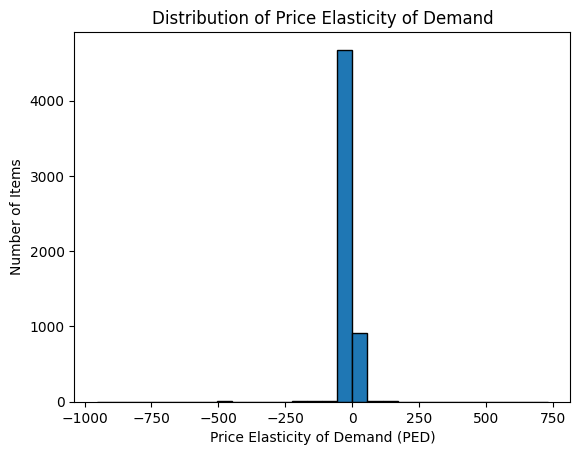

In [56]:
ped_item_store_id_hobbies = hobbies_df.groupby(['item_id','store_id']).apply(ped1,include_groups=False)
print(ped_item_store_id_hobbies )
ped_item_store_id_hobbies.hist(bins=30, edgecolor='black')
plt.title('Distribution of Price Elasticity of Demand')
plt.xlabel('Price Elasticity of Demand (PED)')
plt.ylabel('Number of Items')
plt.grid(False)  
plt.show()

In [34]:
ped_item_store_id_hobbies['state_id'] = ped_item_store_id_hobbies['store_id'].str[:2]
a = ped_item_id_hobbies.merge(ped_item_store_id_hobbies , left_on = 'item_id', right_on = 'item_id')
b = a.merge(ped_item_state_id_hobbies, left_on = ['item_id','state_id'], right_on = ['item_id','state_id'])

In [57]:
b.head()

,item_id,0_x,store_id,0_y,state_id,0
0,HOBBIES_1_001,-6.31366,CA_1,-5.097742,CA,-4.384036
1,HOBBIES_1_001,-6.31366,CA_2,35.232799,CA,-4.384036
2,HOBBIES_1_001,-6.31366,CA_3,34.909486,CA,-4.384036
3,HOBBIES_1_001,-6.31366,CA_4,-4.440415,CA,-4.384036
4,HOBBIES_1_001,-6.31366,TX_1,0.833142,TX,0.174109


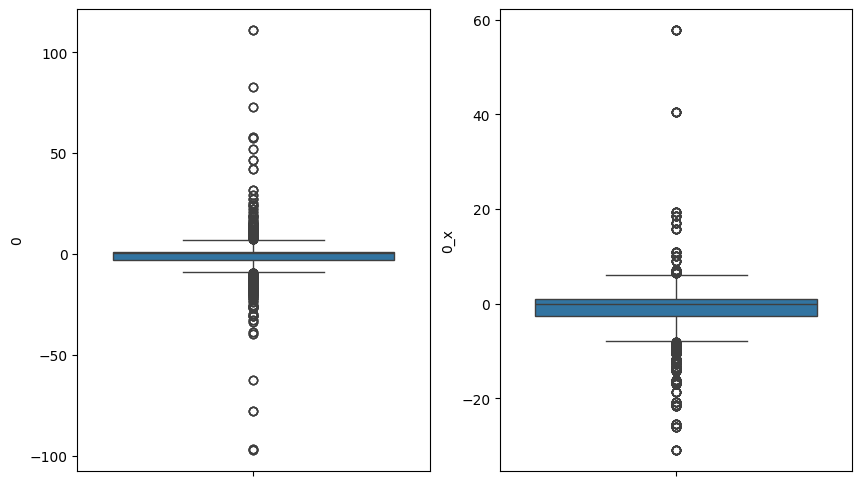

In [59]:
ped_hobbies_filtered = b[(b[0] < 200) & (b[0] > -200)]
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=ped_hobbies_filtered[0],orient='v')
plt.subplot(1, 2, 2)
sns.boxplot(data=ped_hobbies_filtered['0_x'],orient='v')
plt.show()                  

## Calculate PED for foods items

In [61]:
foods_df = pd.read_csv('foods_df.csv')
foods_df =foods_df.drop(foods_df.columns[0],axis=1)
foods_df = foods_df.dropna(subset = ['sell_price'])

/var/folders/7h/s4cspbv95x98l3h5nvklx3ym0000gn/T/ipykernel_51367/2818192195.py:1: DtypeWarning: Columns (15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  foods_df = pd.read_csv('foods_df.csv')


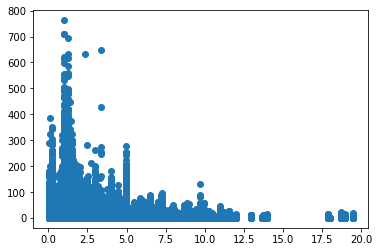

<Figure size 720x432 with 0 Axes>

In [111]:
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(foods_df['sell_price'],foods_df['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [62]:
# How the whole category react to price changes.
# Ex: All food items in the whole Australia.
ped_foods = foods_df.groupby('cat_id').apply(ped1, include_groups = False)
print(ped_foods)

cat_id
FOODS   -0.595671
dtype: float64


In [16]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_food =foods_df.groupby('state_id').apply(ped1,include_groups=False)
print(ped_state_item_id_food)

state_id
CA   -0.561844
TX   -0.598503
WI   -0.641968
dtype: float64


In [17]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_food =foods_df.groupby('store_id').apply(ped1,include_groups=False)
print(ped_store_item_id_food)

store_id
CA_1   -0.574471
CA_2   -0.508451
CA_3   -0.598783
CA_4   -0.510226
TX_1   -0.601425
TX_2   -0.616935
TX_3   -0.574176
WI_1   -0.585910
WI_2   -0.616041
WI_3   -0.711130
dtype: float64


In [63]:
# How the whole category react to price changes.
# Ex: All food items in the whole Australia.
ped_dept_id_foods = foods_df.groupby('dept_id').apply(ped1, include_groups = False)
print(ped_dept_id_foods)

dept_id
FOODS_1   -0.638390
FOODS_2   -0.481386
FOODS_3   -0.594738
dtype: float64


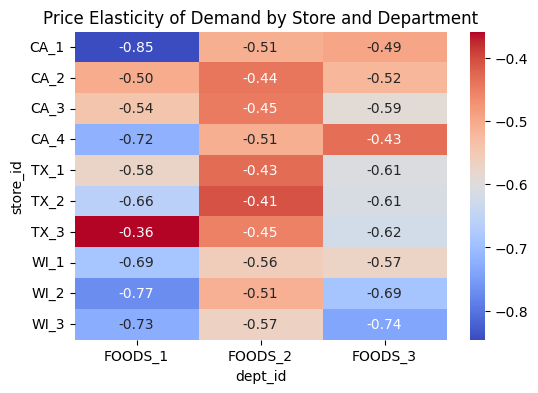

In [67]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_store_dept_id_foods =foods_df.groupby(['store_id','dept_id']).apply(ped1,include_groups=False)
ped_store_dept_id_foods = ped_store_dept_id_foods.to_frame().reset_index()
# Creating a heatmap
ped_store_dept_id_foods.columns = ['store_id', 'dept_id', 'PED']
plt.figure(figsize=(6, 4))
heatmap_data = ped_store_dept_id_foods.pivot(index='store_id', columns='dept_id', values='PED')
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Price Elasticity of Demand by Store and Department')
plt.show()

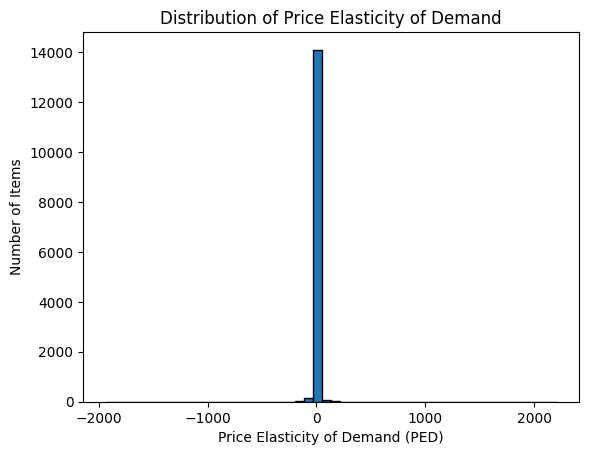

In [69]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
ped_id_foods =foods_df.groupby('id').apply(ped1, include_groups =False)
ped_id_foods = ped_id_foods.to_frame().reset_index()

# plot a histogram
ped_id_foods.hist(bins=50, edgecolor='black')
plt.title('Distribution of Price Elasticity of Demand')
plt.xlabel('Price Elasticity of Demand (PED)')
plt.ylabel('Number of Items')
plt.grid(False)  
plt.show()

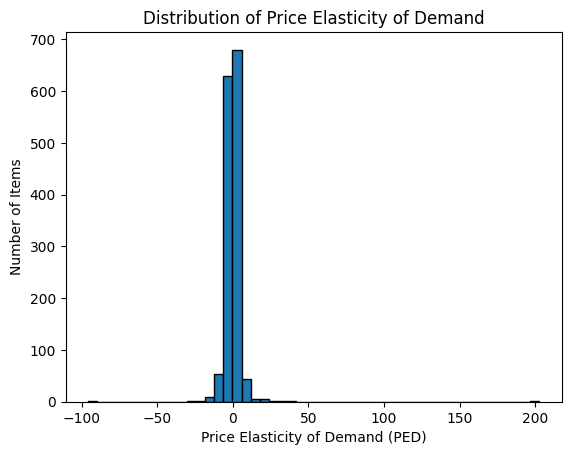

In [70]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_food = foods_df.groupby('item_id').apply(ped1, include_groups =False)
ped_item_id_food = ped_item_id_food.to_frame().reset_index()

# Plot a histogram
ped_item_id_food.hist(bins=50, edgecolor='black')
plt.title('Distribution of Price Elasticity of Demand')
plt.xlabel('Price Elasticity of Demand (PED)')
plt.ylabel('Number of Items')
plt.grid(False)  
plt.show()

item_id      store_id
FOODS_1_001  CA_1       -3.395525
             CA_2       -4.022723
             CA_3       -1.805704
             CA_4       -2.857772
             TX_1       -1.110851
                           ...   
FOODS_3_827  TX_2        1.000000
             TX_3       -3.714840
             WI_1        1.000000
             WI_2        1.000000
             WI_3        1.000000
Length: 14370, dtype: float64


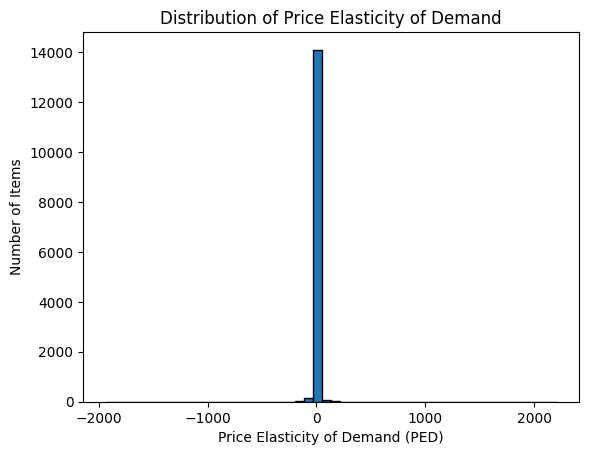

In [71]:
ped_item_store_id_food =foods_df.groupby(['item_id','store_id']).apply(ped1, include_groups =False)
print(ped_item_store_id_food)
ped_item_store_id_food = ped_item_store_id_food.to_frame().reset_index()

# Plot a histogram
ped_item_store_id_food.hist(bins=50, edgecolor='black')
plt.title('Distribution of Price Elasticity of Demand')
plt.xlabel('Price Elasticity of Demand (PED)')
plt.ylabel('Number of Items')
plt.grid(False)  
plt.show()

In [90]:
a_foods = ped_item_id_food.merge(ped_item_store_id_food,left_on ='item_id',right_on = 'item_id')
ped_foods_filtered = a_foods[(a_foods[0] < 100) & (a_foods[0] > -100)]

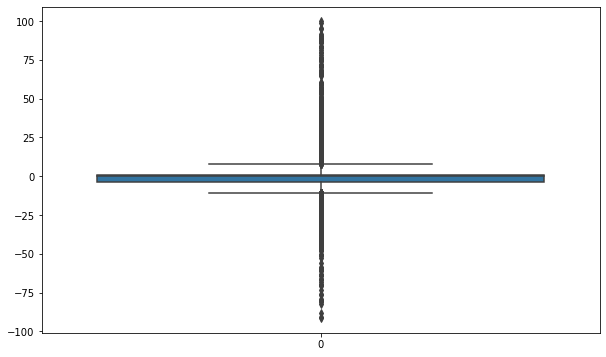

In [184]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=ped_foods_filtered[0],orient='v')
plt.subplot(1, 2, 2)
sns.boxplot(data=ped_foods_filtered['0_x'],orient='v')
plt.show()  

## Caculate PED for households items

In [185]:
households_df = pd.read_csv('households.csv')
households_df = households_df.drop(households_df.columns[0],axis=1)
households_df = households_df.dropna(subset = ['sell_price'])

/Users/chloeang/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


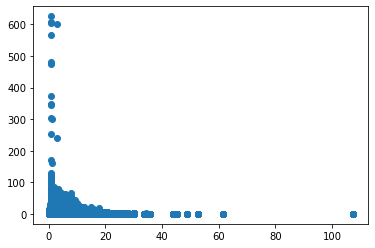

<Figure size 720x432 with 0 Axes>

In [187]:
# We can see the distribution of price and quantity
# when price is low, quantity sold is higher
plt.scatter(households_df['sell_price'],households_df['sold'])
plt.figure(figsize=(10, 6))
plt.show()

In [189]:
# How each specific food items react to price changes.
# Ex: apple in Mcity.
ped_id_households = households_df.groupby('id').apply(calculate_ped)
print(ped_id_households)

id
HOUSEHOLD_1_001_CA_1_validation    -0.994784
HOUSEHOLD_1_001_CA_2_validation    10.577096
HOUSEHOLD_1_001_CA_3_validation     3.494343
HOUSEHOLD_1_001_CA_4_validation     0.134957
HOUSEHOLD_1_001_TX_1_validation    -2.200022
                                     ...    
HOUSEHOLD_2_516_TX_2_validation    -5.833195
HOUSEHOLD_2_516_TX_3_validation     1.000000
HOUSEHOLD_2_516_WI_1_validation     1.000000
HOUSEHOLD_2_516_WI_2_validation     1.000000
HOUSEHOLD_2_516_WI_3_validation     1.000000
Length: 10470, dtype: float64


In [191]:
# How each type of food item react to price changes.
# Ex: Apple in the whole Australia.
ped_item_id_households = households_df.groupby('item_id').apply(calculate_ped)
print(ped_item_id_households)

item_id
HOUSEHOLD_1_001     1.609250
HOUSEHOLD_1_002    -0.215320
HOUSEHOLD_1_003     1.000000
HOUSEHOLD_1_004     2.252436
HOUSEHOLD_1_005    -1.558920
                     ...    
HOUSEHOLD_2_512     0.330760
HOUSEHOLD_2_513     1.000000
HOUSEHOLD_2_514     2.109435
HOUSEHOLD_2_515    -0.136487
HOUSEHOLD_2_516   -13.006727
Length: 1047, dtype: float64


In [192]:
# How foods in each state react to price changes.
# Ex: Foods (apple,orange,banana...) in Victoria.
ped_state_item_id_households = households_df.groupby('state_id').apply(calculate_ped)
print(ped_state_item_id_households)

state_id
CA   -0.672693
TX   -0.835770
WI   -0.861048
dtype: float64


In [193]:
# How foods in each store react to price changes.
# Ex: Foods (apple,orange,banana...) in Mcity.
ped_store_item_id_households = households_df.groupby('store_id').apply(calculate_ped)
print(ped_store_item_id_households)

store_id
CA_1   -0.639014
CA_2   -0.577400
CA_3   -0.770494
CA_4   -0.576431
TX_1   -0.859197
TX_2   -0.786838
TX_3   -0.866839
WI_1   -0.755076
WI_2   -0.958233
WI_3   -0.835668
dtype: float64


In [194]:
# How foods in each dept react to price changes.
# Ex: Foods (apple,orange,banana...) in all dept 1,2,3 including all woolies in Aus.
ped_dept_item_id_households = households_df.groupby('dept_id').apply(calculate_ped)
print(ped_dept_item_id_households)

dept_id
HOUSEHOLD_1   -0.567125
HOUSEHOLD_2   -0.575657
dtype: float64


In [195]:
ped_item_store_id_households = households_df.groupby(['item_id','store_id']).apply(calculate_ped)
print(ped_item_store_id_households)

item_id          store_id
HOUSEHOLD_1_001  CA_1        -0.994784
                 CA_2        10.577096
                 CA_3         3.494343
                 CA_4         0.134957
                 TX_1        -2.200022
                               ...    
HOUSEHOLD_2_516  TX_2        -5.833195
                 TX_3         1.000000
                 WI_1         1.000000
                 WI_2         1.000000
                 WI_3         1.000000
Length: 10470, dtype: float64


In [196]:
ped_item_state_id_households = households_df.groupby(['item_id','state_id']).apply(calculate_ped)
print(ped_item_state_id_households)

item_id          state_id
HOUSEHOLD_1_001  CA           2.890141
                 TX           0.748463
                 WI          -0.671808
HOUSEHOLD_1_002  CA           0.789803
                 TX           1.240118
                               ...    
HOUSEHOLD_2_515  TX          -0.268551
                 WI           1.000000
HOUSEHOLD_2_516  CA           1.000000
                 TX         -10.051395
                 WI           1.000000
Length: 3141, dtype: float64


In [197]:
ped_item_id_households = ped_item_id_households.to_frame().reset_index()
ped_item_store_id_households = ped_item_store_id_households.to_frame().reset_index()
ped_item_state_id_households = ped_item_state_id_households.to_frame().reset_index().reset_index()

In [198]:
ped_item_store_id_households['state_id'] = ped_item_store_id_households['store_id'].str[:2]

In [199]:
a_households = ped_item_id_households.merge(ped_item_state_id_households,left_on ='item_id',right_on = 'item_id')
b_households = a_households.merge(ped_item_store_id_households,left_on =['item_id','state_id'],right_on = ['item_id','state_id'])

In [201]:
b_households.to_csv('households_ped.csv')